In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import OrderedDict
from ripser import Rips
import persim
from sklearn.cluster import AgglomerativeClustering
import warnings
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [4]:
#warnings.filterwarnings('ignore')

In [5]:
#read gdp per person and rename the columns
gdp = pd.read_csv('gdp.csv')
gdp = gdp.rename(columns={"GDP per person employed (constant 2017 PPP $)": "GDP"})

In [6]:
#read population csv, drop some columns, melt columns into rows, change type of column year and rename column
population = pd.read_csv('population.csv', skiprows=3)
population = population.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
population_tall = pd.melt(population, id_vars="Country Code", var_name="Year", value_name="Population")
population_tall["Year"] = population_tall["Year"].astype(np.int64)
population_tall = population_tall.rename(columns={"Country Code": "Code"})
population_tall

Code  Year   Population
0      ABW  1960      54608.0
1      AFE  1960  130692579.0
2      AFG  1960    8622466.0
3      AFW  1960   97256290.0
4      AGO  1960    5357195.0
...    ...   ...          ...
16487  XKX  2021    1786038.0
16488  YEM  2021   32981641.0
16489  ZAF  2021   59392255.0
16490  ZMB  2021   19473125.0
16491  ZWE  2021   15993524.0

[16492 rows x 3 columns]

In [7]:
#merge gdp and population and drop null rows
data = gdp.merge(population_tall, on=["Code", "Year"])
data = data.dropna()

In [8]:
#read workforce csv, drop some columns, melt columns into rows, change type of column year and rename column
workforce = pd.read_csv('WorkForce.csv', skiprows=3)
workforce = workforce.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
workforce_tall = pd.melt(workforce, id_vars="Country Code", var_name="Year", value_name="WorkForce")
workforce_tall["Year"] = workforce_tall["Year"].astype(np.int64)
workforce_tall = workforce_tall.rename(columns={"Country Code": "Code"})
workforce_tall

Code  Year   WorkForce
0      ABW  1960         NaN
1      AFE  1960         NaN
2      AFG  1960         NaN
3      AFW  1960         NaN
4      AGO  1960         NaN
...    ...   ...         ...
16487  XKX  2021         NaN
16488  YEM  2021   7298663.0
16489  ZAF  2021  22397601.0
16490  ZMB  2021   8113422.0
16491  ZWE  2021   7915768.0

[16492 rows x 3 columns]

In [9]:
#merge gdp,population and workforce and drop null rows
data1 = data.merge(workforce_tall, on=["Code", "Year"])
data1 = data1.dropna()

In [10]:
#read refugees csv, drop some columns, melt columns into rows, change type of column year and rename column
refugees = pd.read_csv('refugees.csv', skiprows=3)
refugees = refugees.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
refugees_tall = pd.melt(refugees, id_vars="Country Code", var_name="Year", value_name="Refugees")
refugees_tall["Year"] = refugees_tall["Year"].astype(np.int64)
refugees_tall = refugees_tall.rename(columns={"Country Code": "Code"})
refugees_tall


Code  Year  Refugees
0      ABW  1960       NaN
1      AFE  1960       NaN
2      AFG  1960       NaN
3      AFW  1960       NaN
4      AGO  1960       NaN
...    ...   ...       ...
16487  XKX  2021       NaN
16488  YEM  2021   89467.0
16489  ZAF  2021   75512.0
16490  ZMB  2021   75154.0
16491  ZWE  2021    9483.0

[16492 rows x 3 columns]

In [11]:
#merge gdp,population,workforce and refugees and drop null rows
data2 = data1.merge(refugees_tall, on=["Code", "Year"])
data2 = data2.dropna()

In [12]:
#read schoolenrollment csv, drop some columns, melt columns into rows, change type of column year and rename column
school_enrollment = pd.read_csv('schoolenrollment.csv', skiprows=3)
school_enrollment = school_enrollment.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
school_enrollment_tall = pd.melt(school_enrollment, id_vars="Country Code", var_name="Year", value_name="SchoolEnrollment")
school_enrollment_tall["Year"] = school_enrollment_tall["Year"].astype(np.int64)
school_enrollment_tall = school_enrollment_tall.rename(columns={"Country Code": "Code"})
school_enrollment_tall

Code  Year  SchoolEnrollment
0      ABW  1960               NaN
1      AFE  1960               NaN
2      AFG  1960               NaN
3      AFW  1960               NaN
4      AGO  1960               NaN
...    ...   ...               ...
16487  XKX  2021               NaN
16488  YEM  2021               NaN
16489  ZAF  2021               NaN
16490  ZMB  2021               NaN
16491  ZWE  2021         96.117836

[16492 rows x 3 columns]

In [13]:
#merge gdp,population,workforce, refugees and school enrollment and drop null rows
#final data at the moment
data3 = data2.merge(school_enrollment_tall, on=["Code", "Year"])
data3 = data3.dropna()
data3

Entity Code  Year          GDP  Population  WorkForce  Refugees  \
0     Afghanistan  AFG  2003  5742.153809  22645130.0  5320158.0      24.0   
1     Afghanistan  AFG  2004  5529.232422  23553551.0  5548197.0      31.0   
2     Afghanistan  AFG  2005  5900.214355  24411191.0  5794645.0      31.0   
3     Afghanistan  AFG  2006  6055.205078  25442944.0  6070572.0      34.0   
4     Afghanistan  AFG  2007  6771.464355  25903301.0  6109636.0      43.0   
...           ...  ...   ...          ...         ...        ...       ...   
4213     Zimbabwe  ZWE  2016  7968.250488  14452704.0  7024925.0    7423.0   
4214     Zimbabwe  ZWE  2017  8213.922852  14751101.0  7214627.0    7566.0   
4215     Zimbabwe  ZWE  2018  8464.795898  15052184.0  7403981.0    7795.0   
4216     Zimbabwe  ZWE  2019  7806.484375  15354608.0  7591946.0    8956.0   
4217     Zimbabwe  ZWE  2020  7309.498047  15669666.0  7693983.0    9261.0   

      SchoolEnrollment  
0            93.362183  
1           104.663818  
2            98.099892  
3           101.697853  
4            98.933510  
...                ...  
4213        101.309677  
4214         98.933189  
4215         97.750809  
4216         97.140213  
4217         97.304909  

[3577 rows x 8 columns]

In [14]:
scaler= StandardScaler()
# standardization of data
data3_standardized = data3.copy()
data3_standardized[['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']] = scaler.fit_transform(data3_standardized[['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']]) 
data3_standardized = data3_standardized.sort_values(by=['Code'])
data3_standardized


Entity Code  Year       GDP  Population  WorkForce  Refugees  \
0     Afghanistan  AFG  2003 -0.919385   -0.141360  -0.197016 -0.318141   
16    Afghanistan  AFG  2019 -0.849106   -0.040170  -0.132650 -0.115658   
15    Afghanistan  AFG  2018 -0.849928   -0.047414  -0.137783 -0.115656   
14    Afghanistan  AFG  2017 -0.844672   -0.054395  -0.142691 -0.105282   
13    Afghanistan  AFG  2016 -0.842215   -0.061134  -0.147395 -0.150592   
...           ...  ...   ...       ...         ...        ...       ...   
4189     Zimbabwe  ZWE  1992 -0.841604   -0.221669  -0.205635  0.348422   
4188     Zimbabwe  ZWE  1991 -0.813053   -0.223434  -0.207648  0.236007   
4216     Zimbabwe  ZWE  2019 -0.867206   -0.190137  -0.165648 -0.293092   
4198     Zimbabwe  ZWE  2001 -0.820152   -0.213176  -0.191263 -0.293788   
4217     Zimbabwe  ZWE  2020 -0.879768   -0.188029  -0.164239 -0.292237   

      SchoolEnrollment  
0            -0.440504  
16            0.381103  
15            0.214494  
14            0.102368  
13            0.121505  
...                ...  
4189          0.229076  
4188          0.297900  
4216         -0.207797  
4198          0.599977  
4217         -0.197653  

[3577 rows x 8 columns]

In [15]:
#group datatable as ordered dictionary where dict key is column name entity
slovar = OrderedDict(sorted(data3_standardized.groupby("Entity")))
#get keys and order the so they ordered the sae as in slovar
kljucki = slovar.keys()
kljucki_list = list(kljucki)

In [16]:
#make lists for pointclouds and peristent diagrams of them
pointclouds = []
persistent_diagrams_all = []

In [17]:
#make pointclouds by making an array of points from numerical columns
for kljucek in kljucki_list:
    pointclouds.append(slovar[kljucek][['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']].values)    

In [18]:
#rv filtration + persistent diagrams up to dimension 1 (so H_1)
rips = Rips(maxdim=1)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [19]:
pointclouds

[array([[-0.9193846 , -0.14135954, -0.19701601, -0.31814075, -0.44050435],
        [-0.84910566, -0.04017043, -0.13265006, -0.11565843,  0.38110259],
        [-0.84992765, -0.0474143 , -0.13778255, -0.11565563,  0.21449367],
        [-0.84467196, -0.05439491, -0.14269092, -0.10528235,  0.1023681 ],
        [-0.8422147 , -0.06113362, -0.14739456, -0.15059219,  0.12150464],
        [-0.83829286, -0.06703935, -0.15130507,  0.4040601 ,  0.18605908],
        [-0.82561876, -0.0818406 , -0.16164912, -0.27092395,  0.24543065],
        [-0.826378  , -0.08903105, -0.16662954, -0.27282249,  0.18346412],
        [-0.83094628, -0.0739793 , -0.15607368,  0.52427688,  0.33297412],
        [-0.8340365 , -0.10426396, -0.1776812 , -0.30016488, -0.02723233],
        [-0.85727134, -0.10964553, -0.18090789, -0.3181071 , -0.22281485],
        [-0.89037547, -0.11605573, -0.18490735, -0.31810429,  0.01637822],
        [-0.89336766, -0.11956085, -0.18611522, -0.31808747, -0.09733948],
        [-0.91147189, -0.

In [20]:
#calculate persistent diagrams up to dimension 1 but put into array just H_0
for i,pointcloud in enumerate(pointclouds):
    if len(pointcloud)>1:
        persistent_diagrams_all.append(rips.fit_transform(pointcloud)[0])
    else:
        del kljucki_list[i]

/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; 

In [21]:
#initialize distance matrix for bottleneck distance
matrika_razdalj = np.zeros((len(persistent_diagrams_all),len(persistent_diagrams_all)))

In [22]:
#boundary of distance matrix
meja = len(persistent_diagrams_all)

In [23]:
#compute bottleneck distance matrix for all persistent diagrams H_0 for all pointclouds
for i in range(0,meja):
    for j in range(i+1,meja):
        if not (len(persistent_diagrams_all[i]) == 1 & len(persistent_diagrams_all[j]) == 1):
            matrika_razdalj[i][j] = persim.bottleneck(persistent_diagrams_all[i], persistent_diagrams_all[j], matching=False)
            matrika_razdalj[j][i] = matrika_razdalj[i][j]
       
    

/home/jon/.local/lib/python3.9/site-packages/persim/bottleneck.py:56: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/bottleneck.py:66: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(


In [24]:
#make clustering for matrika_razdalj
clustering = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.1, n_clusters=None).fit(matrika_razdalj)
#check nr of clusters
clustering.n_clusters_

66

In [25]:
#check all the clusters 
clusterji = clustering.labels_
clusterji

array([32, 12, 12, 55, 12, 61,  9, 14, 53, 14, 14, 63, 17, 14, 14, 64, 12,
       16, 45, 62, 30, 33, 15,  5, 14, 43,  5, 51, 42, 13, 37, 57,  9,  8,
       11,  0, 12, 52, 14, 13,  2,  6, 11, 38, 14, 62,  1, 23, 16, 12, 39,
        2,  2, 58, 11, 14,  3, 59, 44, 16, 12,  0, 10, 14, 60,  0, 65, 19,
       56, 16, 14, 13, 13, 34, 27, 50, 31, 13, 16, 32, 19, 12, 16,  6, 22,
       18, 29, 16, 30, 12,  5, 17,  0, 21,  3, 41, 30,  6, 16,  3, 10, 16,
        2,  8, 15, 14,  0,  4, 48,  8, 62, 54,  2,  2, 12, 20, 14,  2, 15,
        5, 49, 35, 16,  7, 62, 26, 40, 23, 14,  2, 22, 12, 14, 13, 14, 36,
       46,  7, 17, 10,  1, 14, 26, 16, 16, 47, 28,  4, 24,  2, 25, 14, 13,
       23, 12,  6,  9])

In [26]:
#connect array of clusters clusterji with pointclouds by name of the country
dict1 = {}
for i in range(0,len(kljucki_list)-20):
    dict1[clusterji[i]] = []
for i in range(0,len(kljucki_list)-20):
    if kljucki_list[i] not in dict1[clusterji[i]]:
        dict1[clusterji[i]] = dict1[clusterji[i]]+[kljucki_list[i]]

In [27]:
#initialize distance matrix for wasserstein distance
matrika_razdalj1 = np.zeros((len(persistent_diagrams_all),len(persistent_diagrams_all)))

In [28]:
#compute wasserstein distance matrix for all persistent diagrams H_0 for all pointclouds
for i in range(0,meja):
    for j in range(i+1,meja):
        matrika_razdalj1[i][j] = persim.wasserstein(persistent_diagrams_all[i], persistent_diagrams_all[j], matching=False)
        matrika_razdalj1[j][i] = matrika_razdalj1[i][j]
       

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/jon/.local/lib/python3.9/site-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
#make clustering for matrika_razdalj1
clustering1 = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.7, n_clusters=None).fit(matrika_razdalj1)
#check nr of clusters
clustering1.n_clusters_

65

In [30]:
#check all the clusters
clusterji1 = clustering1.labels_
clusterji1

array([ 6, 15, 15, 55, 31, 33, 25, 31, 53,  0,  0, 57, 10, 46, 46,  1, 46,
       46, 42, 26, 18, 59, 11, 63, 46, 14,  1, 30, 62, 46, 51, 44,  3,  7,
       26, 21, 15, 56, 46,  0, 10,  5,  4, 30, 46,  4, 60,  0, 46, 15, 38,
       11, 11, 12,  4, 31,  5, 12, 41,  0, 25, 49, 29, 46, 58,  8, 64, 16,
       36, 46, 15,  0,  0, 50, 27, 32, 20, 25, 46,  6, 16,  0, 31,  2, 61,
       52, 37, 31,  7, 15, 24,  0, 21, 28,  9,  6, 22,  2, 31,  5,  3, 46,
        3,  7, 18, 46, 21,  6, 35, 34,  4, 17, 10,  3,  3,  8, 46, 10, 22,
       24, 47, 45,  0, 13,  4, 11, 48, 51, 15,  3, 61, 15, 31, 46, 46, 40,
       54, 23,  3, 25, 39, 15, 29,  0, 46, 19, 43,  6, 14, 10,  9, 46, 31,
       51, 15,  2,  6])

In [31]:
#connect array of clusters clusterji1 with pointclouds by name of the country
dict2 = {}
for i in range(0,len(kljucki_list)-10):
    dict2[clusterji1[i]] = []
    
for i in range(0,len(kljucki_list)-10):
    if kljucki_list[i] not in dict2[clusterji1[i]]:
        dict2[clusterji1[i]] = dict2[clusterji1[i]]+[kljucki_list[i]]

In [32]:
kljucki_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'L

In [33]:
#helper function for plotting dendrograms from scipy library
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

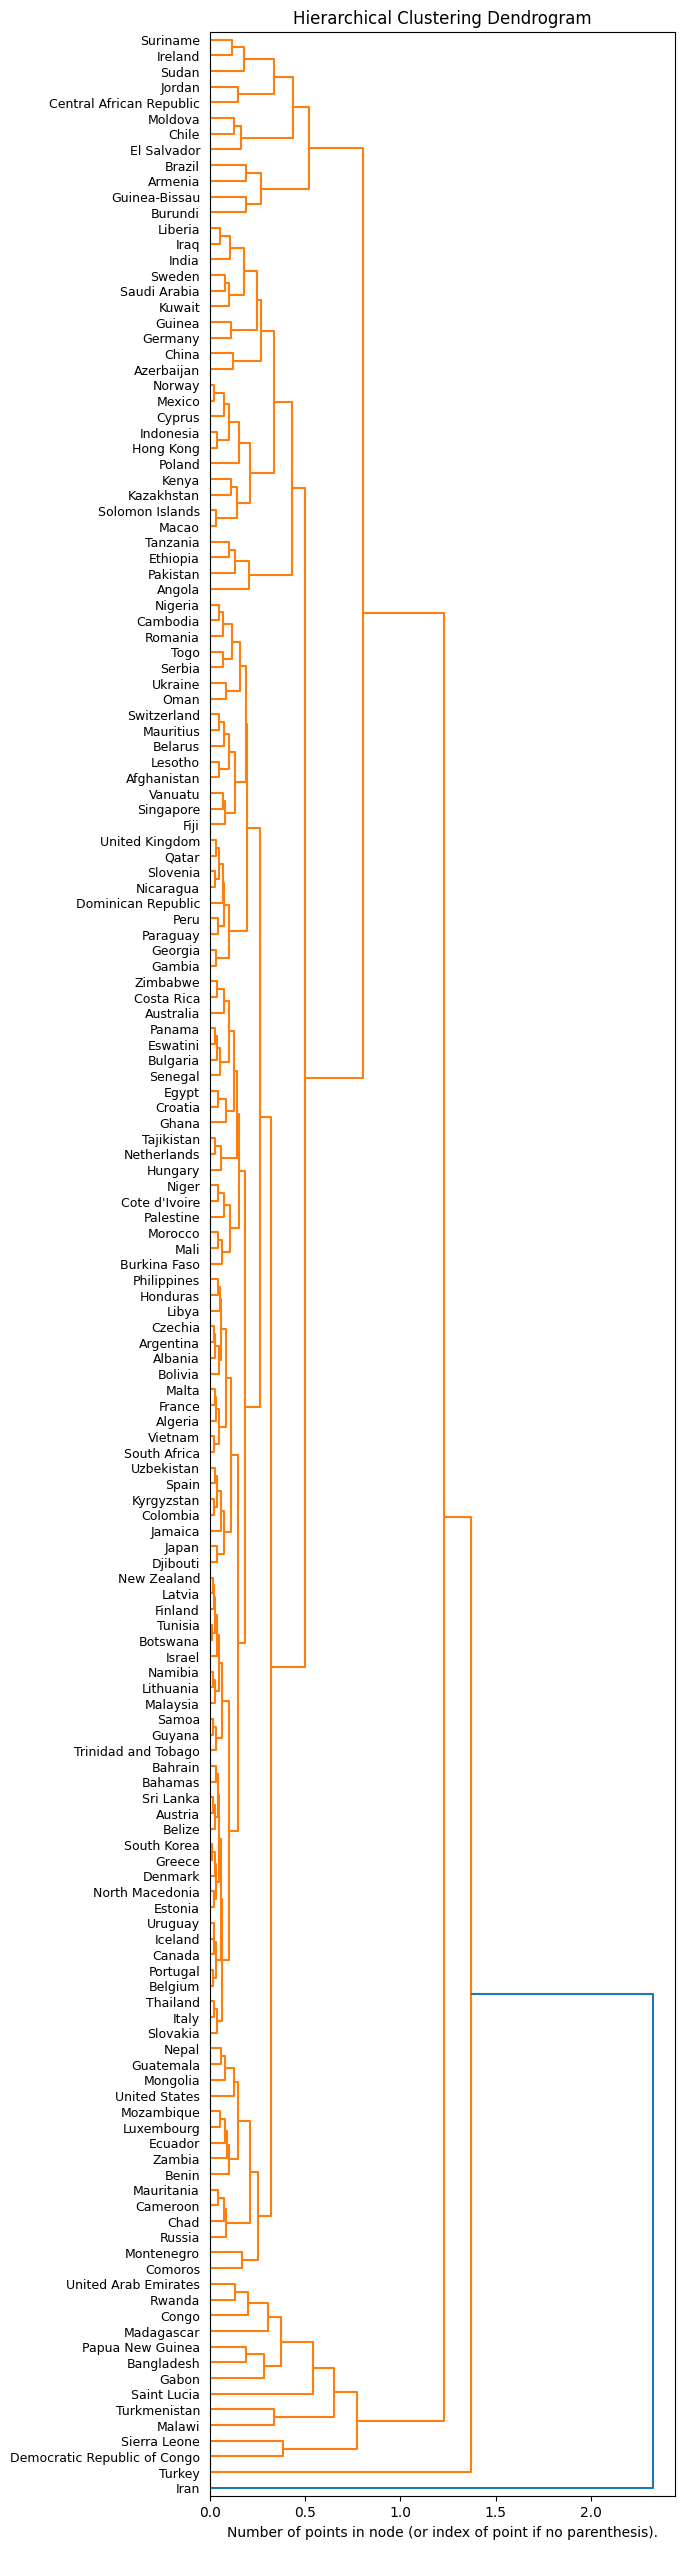

In [34]:
#plot dendrogram for clustering (bottleneck distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=20, ax=ax, labels=kljucki_list, orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

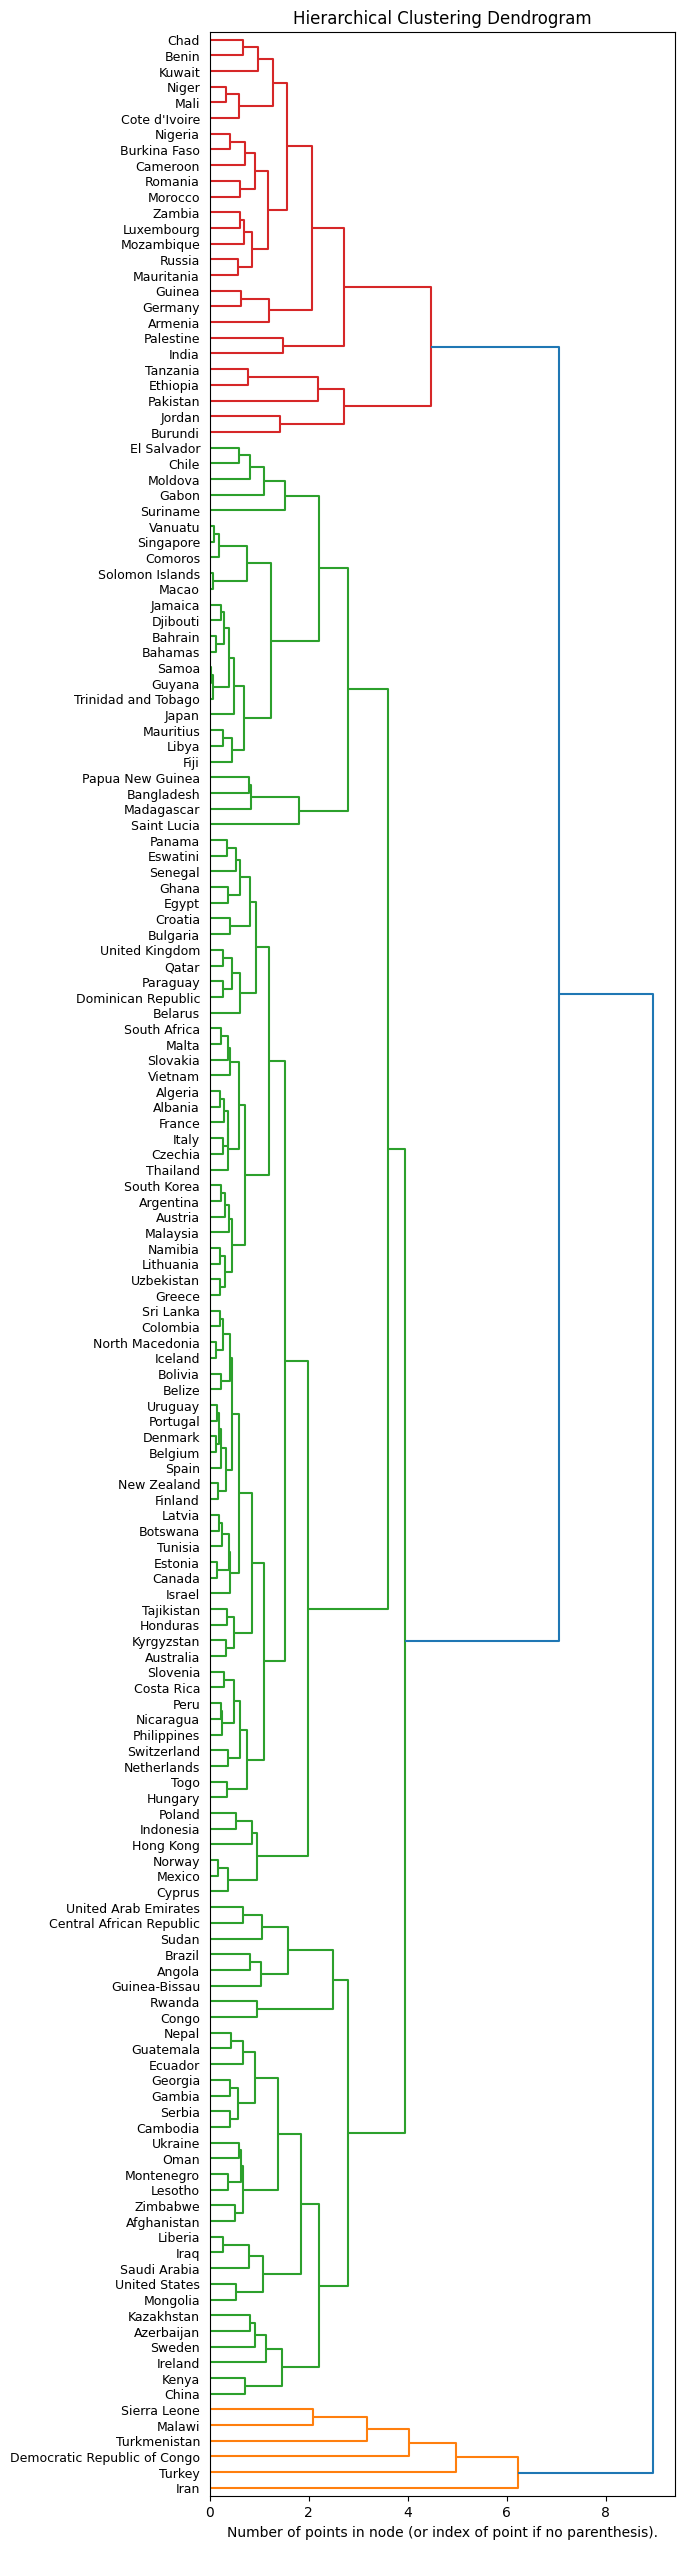

In [35]:
#plot dendrogram for clustering1 (wasserstein distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering1, truncate_mode="level", p=20, ax=ax, labels=kljucki_list, orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

In [36]:
#end of project

### Vectorization with Euclidean distance comparison

In [38]:
import pervect

In [39]:
pervector = pervect.PersistenceVectorizer()

In [40]:
ordered_country_pds = dict()
i = 0
for country in kljucki_list:
    ordered_country_pds[country] = persistent_diagrams_all[i]
    i+=1

In [41]:
ordered_country_pds

{'Afghanistan': array([[0.        , 0.04992757],
        [0.        , 0.05088923],
        [0.        , 0.05692103],
        [0.        , 0.06074166],
        [0.        , 0.06261421],
        [0.        , 0.07475992],
        [0.        , 0.08600812],
        [0.        , 0.09519215],
        [0.        , 0.10103279],
        [0.        , 0.12671062],
        [0.        , 0.14205025],
        [0.        , 0.15179145],
        [0.        , 0.1668473 ],
        [0.        , 0.19016041],
        [0.        , 0.22915502],
        [0.        , 0.51643848],
        [0.        ,        inf]]),
 'Albania': array([[0.        , 0.00344778],
        [0.        , 0.01332956],
        [0.        , 0.01791379],
        [0.        , 0.03392034],
        [0.        , 0.04573822],
        [0.        , 0.04922431],
        [0.        , 0.05610766],
        [0.        , 0.06290743],
        [0.        , 0.06499811],
        [0.        , 0.0737676 ],
        [0.        , 0.07740002],
        [0.        ,

In [42]:
ordered_country_pds_reduced = dict()
for country,data in ordered_country_pds.items():
    ordered_country_pds_reduced[country] = np.array([[e[0], e[1]] for e in data if np.isfinite(e[1])])

In [43]:
vectors = pervector.fit_transform(list(ordered_country_pds_reduced.values()))

In [44]:
ordered_country_vectors = dict()
i = 0
for country,data in ordered_country_pds.items():
    ordered_country_vectors[country] = vectors[i]
    i+=1

In [45]:
ordered_country_vectors
distance_matrix_euclidean = {name2:{name1:np.linalg.norm(e1-e2) for name1,e1 in ordered_country_vectors.items()} for name2,e2 in ordered_country_vectors.items()}

In [46]:
#make clustering for matrika_razdalj1
clusters_euclidean = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=4.5, n_clusters=None).fit([[e1 for e1 in e.values()] for e in distance_matrix_euclidean.values()])
#check nr of clusters
clusters_euclidean.n_clusters_

60

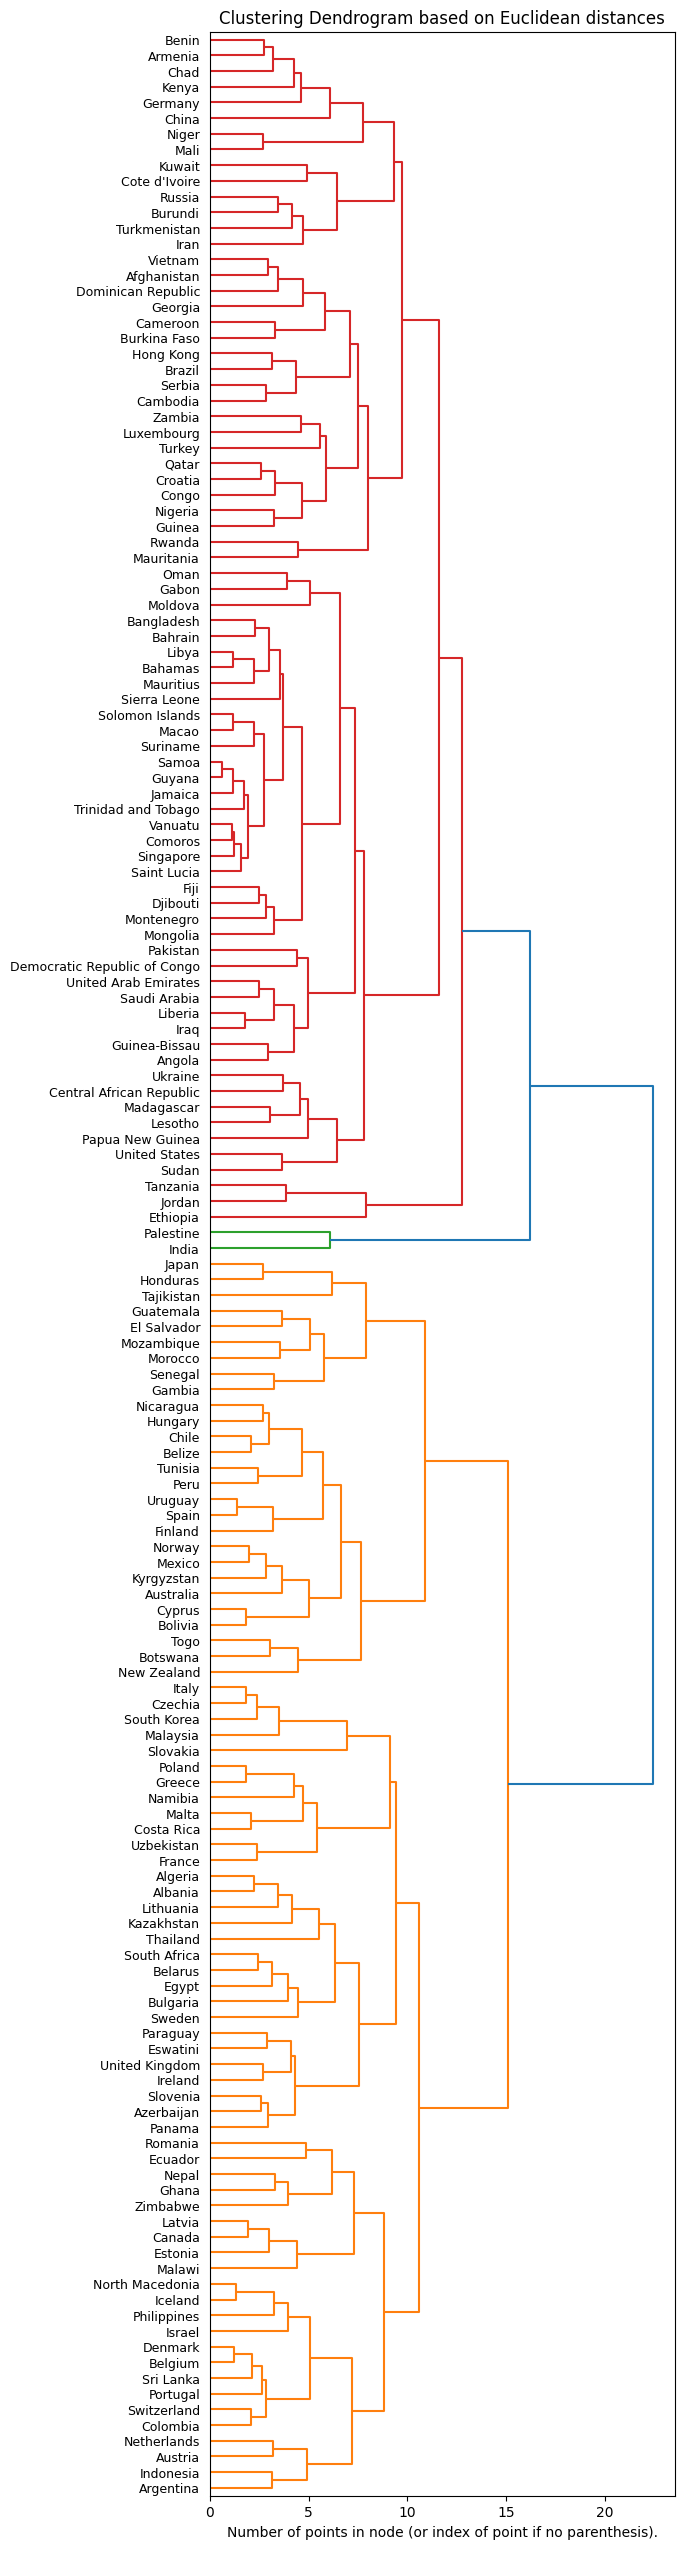

In [47]:
#plot dendrogram for clustering (Euclidean distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Clustering Dendrogram based on Euclidean distances")
# plot the top three levels of the dendrogram
plot_dendrogram(clusters_euclidean, truncate_mode="level", p=20, ax=ax, labels=list(distance_matrix_euclidean.keys()), orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.savefig("euclidean.png")

### Vectorization with Persistence images - Naive approach

In [48]:
primg = persim.PersistenceImager()

In [49]:
primg.fit(list(ordered_country_pds_reduced.values()))
primg.birth_range = (0,3)
images = primg.transform(list(ordered_country_pds_reduced.values()))

In [50]:
ordered_country_images = dict()
i = 0
for country,data in ordered_country_pds.items():
    ordered_country_images[country] = images[i]
    i+=1

In [51]:
distance_matrix_pi = {name2:{name1:np.linalg.norm(e1-e2) for name1,e1 in ordered_country_images.items()} for name2,e2 in ordered_country_images.items()}

In [52]:
#make clustering for matrika_razdalj1
clusters_pi = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.013, n_clusters=None).fit([[e1 for e1 in e.values()] for e in distance_matrix_pi.values()])
#check nr of clusters
clusters_pi.n_clusters_

42

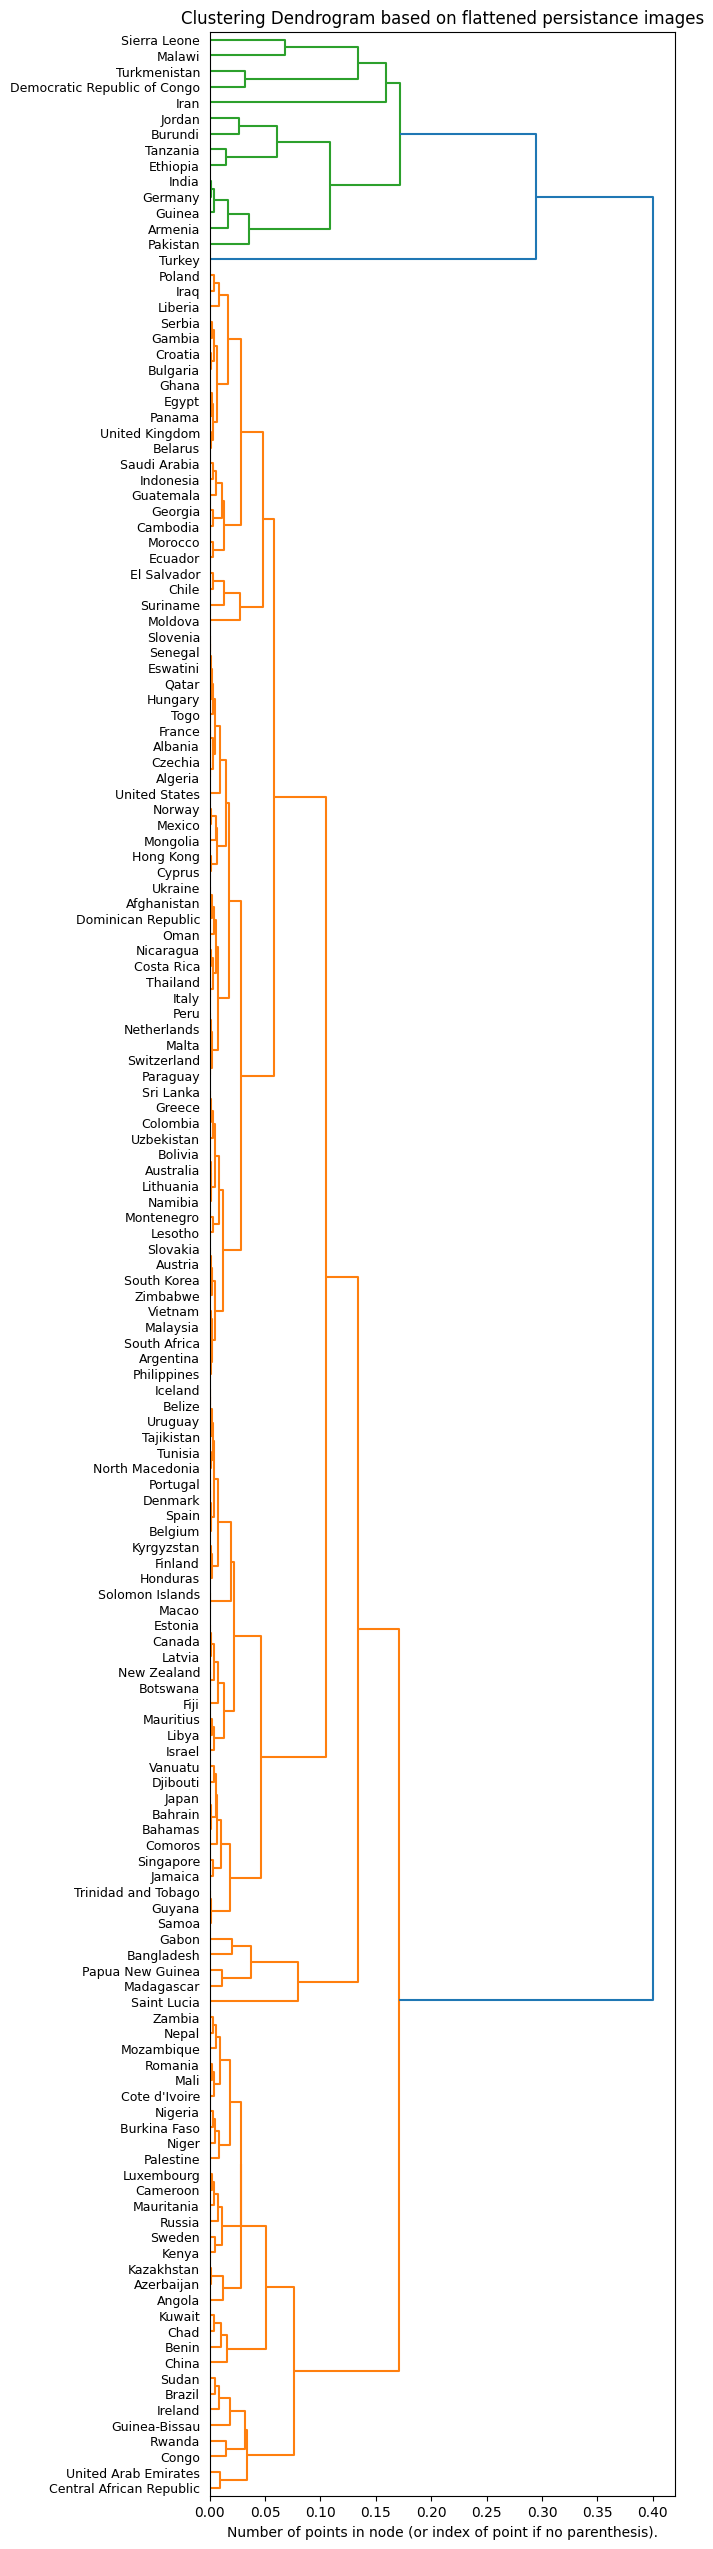

In [53]:
#plot dendrogram for clustering (Euclidean distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Clustering Dendrogram based on flattened persistance images")
# plot the top three levels of the dendrogram
plot_dendrogram(clusters_pi, truncate_mode="level", p=20, ax=ax, labels=list(distance_matrix_euclidean.keys()), orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.savefig("perimg.png")

### MSE Image approach

In [54]:
import cv2

In [ ]:
primg.plot_image(ordered_country_images["Senegal"])

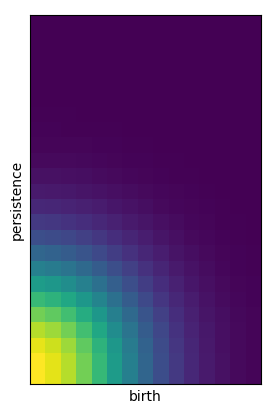

In [189]:
ordered_image_data = dict()
for country,data in ordered_country_images.items():
    #print(data)
    primg.plot_image(data)
    plt.savefig(f"country_images/{country}.png")
    ordered_image_data[country] = cv2.cvtColor(cv2.imread(f"country_images/{country}.png"), cv2.COLOR_BGR2GRAY)

In [190]:
def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse

In [191]:
distance_matrix_mse = {name2:{name1:mse(e1,e2) for name1,e1 in ordered_image_data.items()} for name2,e2 in ordered_image_data.items()}

In [192]:
#make clustering for matrika_razdalj1
clusters_mse = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.093, n_clusters=None).fit([[e1 for e1 in e.values()] for e in distance_matrix_mse.values()])
#check nr of clusters
clusters_mse.n_clusters_

43

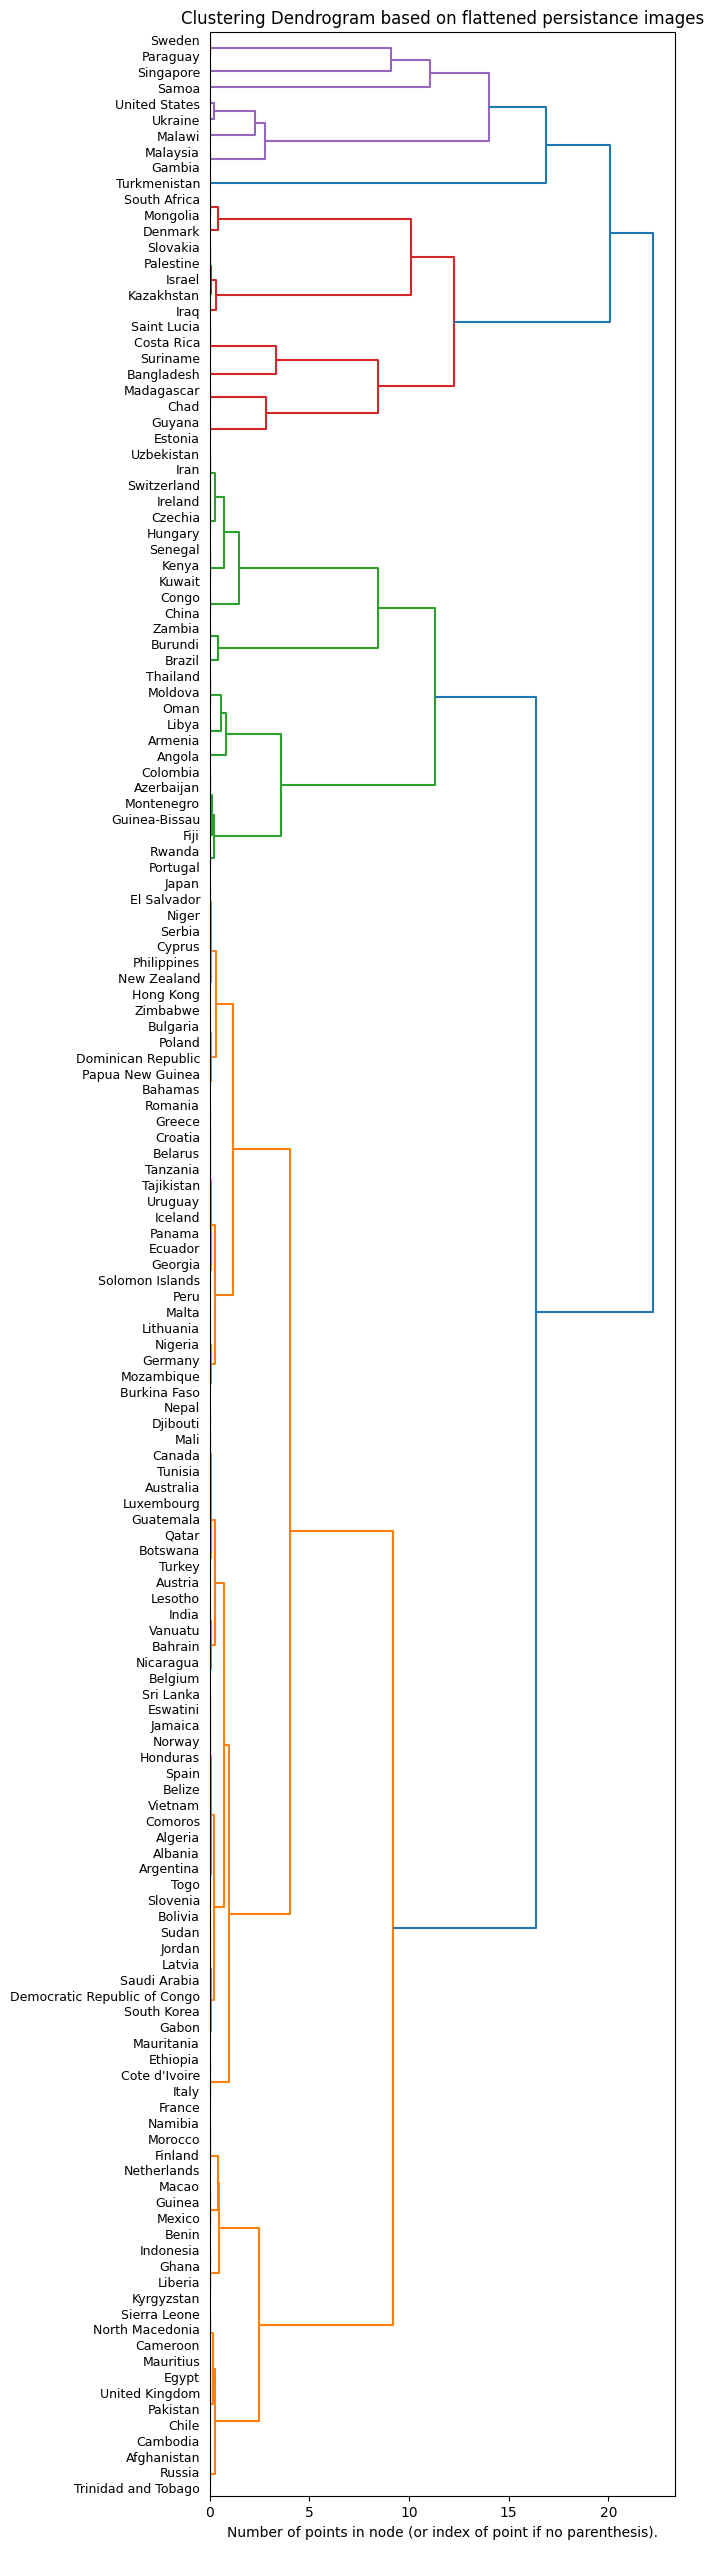

In [193]:
#plot dendrogram for clustering (Euclidean distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Clustering Dendrogram based on flattened persistance images")
# plot the top three levels of the dendrogram
plot_dendrogram(clusters_mse, truncate_mode="level", p=20, ax=ax, labels=list(distance_matrix_euclidean.keys()), orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.savefig("mse.png")

In [33]:
#from that line onwards it was just testing the functions

Rips(maxdim=3, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


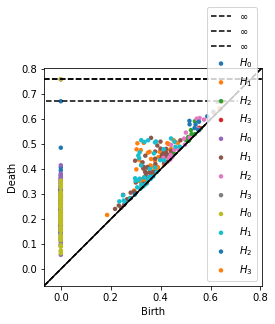

In [9]:
import numpy as np
from ripser import Rips
data=[]
diagrams =[]
rips = Rips(maxdim=3)
data.append(np.random.random((100,4)))
data.append(np.random.random((100,4)))
data.append(np.random.random((100,4)))
diagrams.append(rips.fit_transform(data[0]))
diagrams.append(rips.fit_transform(data[1]))
diagrams.append(rips.fit_transform(data[2]))
rips.plot(diagrams[0])
rips.plot(diagrams[1])
rips.plot(diagrams[2])

In [10]:
rips.fit_transform(data[2])

[array([[0.        , 0.06343266],
        [0.        , 0.07175051],
        [0.        , 0.0732814 ],
        [0.        , 0.08987737],
        [0.        , 0.0899964 ],
        [0.        , 0.09527141],
        [0.        , 0.11605973],
        [0.        , 0.11685699],
        [0.        , 0.12084437],
        [0.        , 0.12521757],
        [0.        , 0.12853746],
        [0.        , 0.12963575],
        [0.        , 0.13165046],
        [0.        , 0.13697758],
        [0.        , 0.15310362],
        [0.        , 0.15416178],
        [0.        , 0.1557339 ],
        [0.        , 0.1620516 ],
        [0.        , 0.16357039],
        [0.        , 0.16530854],
        [0.        , 0.16711047],
        [0.        , 0.17945172],
        [0.        , 0.18167819],
        [0.        , 0.18227226],
        [0.        , 0.18382274],
        [0.        , 0.18539917],
        [0.        , 0.18884329],
        [0.        , 0.1890709 ],
        [0.        , 0.19252148],
        [0.   

In [11]:
import persim

In [12]:
wasserstein_dists=persim.wasserstein(diagrams[0][2], diagrams[1][2], matching=False)
wasserstein_dists1=persim.wasserstein(diagrams[0][2], diagrams[2][2], matching=False)
wasserstein_dists2=persim.wasserstein(diagrams[2][2], diagrams[1][2], matching=False)

In [13]:
wasserstein_dists

0.24966257432541272

In [14]:
wasserstein_dists1

0.19294226745670895

In [15]:
wasserstein_dists2

0.3017684635149724

In [16]:
wasserstein_dists3=persim.bottleneck(diagrams[0][2], diagrams[1][2], matching=False)
wasserstein_dists4=persim.bottleneck(diagrams[0][2], diagrams[2][2], matching=False)
wasserstein_dists5=persim.bottleneck(diagrams[2][2], diagrams[1][2], matching=False)

In [17]:
wasserstein_dists3

0.02781665325164795

In [18]:
wasserstein_dists4

0.022810697555541992

In [19]:
wasserstein_dists5

0.031874775886535645

In [20]:
#testing end

In [21]:
#make pointclouds

In [22]:
np.random.random((100,2))

array([[0.89994792, 0.26688143],
       [0.39691996, 0.93833351],
       [0.64077796, 0.18342956],
       [0.62940551, 0.8118297 ],
       [0.50784593, 0.69631277],
       [0.76017928, 0.03426571],
       [0.38451914, 0.78078938],
       [0.36900902, 0.15235026],
       [0.17566982, 0.14768604],
       [0.27562161, 0.55494276],
       [0.50869737, 0.82139915],
       [0.34371631, 0.02316743],
       [0.15930562, 0.65718607],
       [0.68970898, 0.36016056],
       [0.06931312, 0.61154781],
       [0.2721804 , 0.47045731],
       [0.47467323, 0.93256514],
       [0.82982457, 0.67310363],
       [0.49775048, 0.17573278],
       [0.45949055, 0.9890466 ],
       [0.62119804, 0.57564537],
       [0.01132489, 0.82235948],
       [0.79465822, 0.00310386],
       [0.43639606, 0.40612694],
       [0.25107232, 0.31504782],
       [0.64425435, 0.68676804],
       [0.44431041, 0.99142908],
       [0.46524653, 0.32982703],
       [0.28989409, 0.41913833],
       [0.51709203, 0.45453536],
       [0.